In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.util import ngrams
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-43-28f22a202f35>, line 3)

# EJEMPLO DE SEBAS VADER JEJEJEJEJEJEJEJE

In [2]:
sentences = [
    "VADER is smart, handsome, and funny.",
    "Most automated sentiment analysis tools are shit."
]

In [3]:
sid = SentimentIntensityAnalyzer()

In [4]:
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
Most automated sentiment analysis tools are shit.
compound: -0.5574, neg: 0.375, neu: 0.625, pos: 0.0, 


In [5]:
for sentence in sentences:
    for word in tokenize.word_tokenize(sentence):
        print(f'{word}: {sid.polarity_scores(word)["compound"]}')

VADER: 0.0
is: 0.0
smart: 0.4019
,: 0.0
handsome: 0.4939
,: 0.0
and: 0.0
funny: 0.4404
.: 0.0
Most: 0.0
automated: 0.0
sentiment: 0.0
analysis: 0.0
tools: 0.0
are: 0.0
shit: -0.5574
.: 0.0


### Lectura de datos

In [2]:
datos = pd.read_csv("datos.csv")

In [3]:
valores = pd.Series([],dtype=pd.StringDtype()) 

In [4]:
datosIMP = datos[['name','reviews.text','reviews.title']]
datosIMP = datosIMP.fillna("0")

In [5]:
datosIMP

,name,reviews.text,reviews.title
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),love album good hip hop side current pop soun...,Just Awesome
1,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor review collected part promotion,Good
2,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor,Good
3,K-Y Love Sensuality Pleasure Gel,read reviews looking buying one couples lubri...,Disappointed
4,K-Y Love Sensuality Pleasure Gel,husband bought gel us gel caused irritation f...,Irritation
...,...,...,...
71039,Opti-Free Puremoist Disinfecting Solution 10fl Oz,im dealing dry eyes sensitive products eye cli...,Solves the problem
71040,Opti-Free Puremoist Disinfecting Solution 10fl Oz,great stuff helps keep contacts moist day,Great stuff!
71041,Opti-Free Puremoist Disinfecting Solution 10fl Oz,right price,My review
71042,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,pleased scarf arrived multiple reasons print ...,Wonderful Product


### Wordcloud

In [30]:
review_data = datos[['reviews.text','reviews.title']]

In [14]:
english_stopwords = set(stopwords.words('english'))

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=english_stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

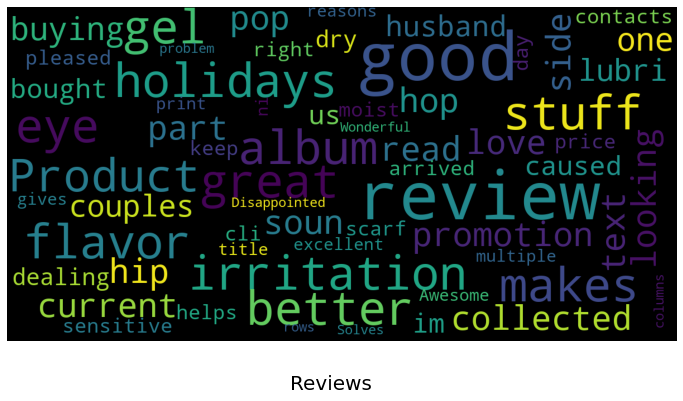

In [31]:
show_wordcloud(review_data, title='Reviews')

### N-Gramas

In [39]:
ngram_data = datos[['reviews.text']].astype(str).values.tolist()

In [40]:
ngram_data

[[' love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors just crazy'],
 ['good flavor review collected part promotion'],
 ['good flavor'],
 [' read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use just use normal personal lubricant less money less mess'],
 [' husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel'],
 [' boyfriend bought spice things bedroom highly disappointed product bought one absolutely love ky mine thought similar affect absolutely nothing buy'],
 ['bought earlier today excited check based product description expecting something just like regular ky fans just expected left little disap

In [57]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele[0]   
    
    # return string   
    return str1  

In [64]:
ngram_data = listToString(ngram_data)

In [65]:
tokenized_text = tokenize.word_tokenize(ngram_data)

In [68]:
reviews_1_gram = list(ngrams(tokenized_text, 1))
reviews_2_gram = list(ngrams(tokenized_text, 2))
reviews_3_gram = list(ngrams(tokenized_text, 3))

In [69]:
reviews_1_gram[:10]

[('love',),
 ('album',),
 ('good',),
 ('hip',),
 ('hop',),
 ('side',),
 ('current',),
 ('pop',),
 ('sound',),
 ('hype',)]

In [70]:
reviews_2_gram[:10]

[('love', 'album'),
 ('album', 'good'),
 ('good', 'hip'),
 ('hip', 'hop'),
 ('hop', 'side'),
 ('side', 'current'),
 ('current', 'pop'),
 ('pop', 'sound'),
 ('sound', 'hype'),
 ('hype', 'listen')]

In [71]:
reviews_3_gram[:10]

[('love', 'album', 'good'),
 ('album', 'good', 'hip'),
 ('good', 'hip', 'hop'),
 ('hip', 'hop', 'side'),
 ('hop', 'side', 'current'),
 ('side', 'current', 'pop'),
 ('current', 'pop', 'sound'),
 ('pop', 'sound', 'hype'),
 ('sound', 'hype', 'listen'),
 ('hype', 'listen', 'everyday')]

In [6]:
sid = SentimentIntensityAnalyzer()

In [11]:
for index, row in datosIMP.iterrows():
    #print(index+1,row['reviews.text'])
    ss = sid.polarity_scores(row['reviews.text'])
    gb = ss['compound']
    #print(index)
    valores[index]=gb 

In [12]:
valores

0        0.6908
1        0.4404
2        0.4404
3       -0.7305
4       -0.4423
          ...  
71039   -0.2732
71040    0.7717
71041    0.0000
71042    0.9790
71043    0.9001
Length: 71044, dtype: float64

In [13]:
datosIMP.insert(2, "Compound", valores) 
datosIMP.head() 

,name,reviews.text,Compound,reviews.title
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),love album good hip hop side current pop soun...,0.6908,Just Awesome
1,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor review collected part promotion,0.4404,Good
2,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor,0.4404,Good
3,K-Y Love Sensuality Pleasure Gel,read reviews looking buying one couples lubri...,-0.7305,Disappointed
4,K-Y Love Sensuality Pleasure Gel,husband bought gel us gel caused irritation f...,-0.4423,Irritation


In [42]:
pd.set_option('display.max_colwidth', -1)

/home/gustavo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


# TOP 5 MEJORES PRODUCTOS

In [14]:
datosIMPBEST = datosIMP.sort_values(by=['Compound'],ascending=False)
datosIMPBEST = datosIMPBEST.drop_duplicates(subset='reviews.text', keep="last")
datosIMPBEST.head() 

,name,reviews.text,Compound,reviews.title
47659,Hard Day's Night (blu-Ray),hard days night movie changed everything ever...,0.9989,TEN STARS for Criterion's Blu Ray (The opening...
68920,Storks (blu-Ray),see warner brothers animation attempting can ...,0.9983,Funny if not Instantly Forgettable
35108,The Jungle Book (blu-Ray/dvd + Digital),enjoyed watching bluraydvd combo jungle book ...,0.9982,Great Live Action Adaptation of this Classic Tale
23498,Godzilla 3d Includes Digital Copy Ultraviolet ...,loved loved love love loved itloved loved love...,0.9982,Loved it
54679,"Olay Total Effects Daily Moisturizer, 7-In-1 A...",first review using olay total effects antiagi...,0.9980,Impressed!


# TOP 5 PEORES PRODUCTOS

In [15]:
datosIMPWORST = datosIMP.sort_values(by=['Compound'])
datosIMPWORST = datosIMPWORST.drop_duplicates(subset='reviews.text', keep="last")
datosIMPWORST.head() 

,name,reviews.text,Compound,reviews.title
5539,100:Complete First Season (blu-Ray),post apocalyptic scifi offering many elements...,-0.9783,Post Apocalyptic Sci-Fi Series
62856,Independence Day Resurgence (4k/uhd + Blu-Ray ...,bad bad bad bad bad bad whywhywhy,-0.9682,No
70307,Kiss174 Everlasting French Nails-String Of Pearls,easy put u use lot glue itll pop sides glue me...,-0.9674,first timer
4640,The Resident Evil Collection 5 Discs (blu-Ray),honestly knew terrible films bored needed some...,-0.9628,Don't Waste Your Time!
28784,"Storkcraft Tuscany Glider and Ottoman, Beige C...",purchased glider use new baby arrives major d...,-0.9623,Major Disappointment / Poorly Made


# Usuarios que dan la mayor cantidad de reviews a distintos productos

In [16]:
datosUser = datos[['reviews.username']]
datosUser['reviews.count'] = datosUser.groupby('reviews.username')['reviews.username'].transform('count')
datosUser = datosUser.sort_values(by=['reviews.count'],ascending=False)
datosUser = datosUser.drop_duplicates(subset='reviews.count', keep="last")
datosUser.head()

/home/gustavo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reviews.username,reviews.count
51160,An anonymous customer,421.0
4155,Anonymous,113.0
48059,Mike,105.0
25752,Chris,88.0
17235,ByAmazon Customer,58.0


#### ¿Cuáles son los usuarios que más reviews negativos y positivos dan en promedio?
- Se utiliza en analizador de sentimientos de nltk para calcuar "polarity scores" para cada review, y se agrega una columna con titulo "positive", la cual es un valor Booleano que indica si el review es positivo o no.

In [2]:
o_data = pd.read_csv('./data/datos.csv')
o_data['id'].count()

71044

In [3]:
data = o_data[['id', 'manufacturer', 'name', 'reviews.text', 'reviews.username']]
data.rename(columns={'name': 'product', 'reviews.text': 'text', 'reviews.username': 'username'}, inplace=True)

/home/sevic69/Documents/uvg/2020_s2/data_science/lab5/lib/python3.6/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
sid = SentimentIntensityAnalyzer()

In [5]:
data['positive'] = data['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'] >= 0.05)

/home/sevic69/Documents/uvg/2020_s2/data_science/lab5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
positive_reviews_by_user = data[data['positive'] == True].groupby(['username'])

A continuación se muestran los usuarios con más reviews positivos, ignorando los usuarios "An anonymous customer", "Anonymous", "ByAmazon Customer", que probablemente agrupan a múltiples usuarios:
- El usuario con nombre Mike es quién más reviews positivos ha dejado.
- Cabe mencionar que el dataset, al no proveer un id de usuario, podría agrupar a varios usuarios bajo el nombre "Mike".

In [7]:
positive_reviews_by_user.count().sort_values(by=['id'], ascending=False)[1:10]

,id,manufacturer,product,text,positive
username,,,,,
Mike,100,100,100,100,100
Anonymous,91,91,91,91,91
Chris,79,79,79,79,79
Dave,54,54,54,54,54
John,43,43,43,43,43
ByAmazon Customer,41,41,41,41,41
Rick,34,34,34,34,34
James,28,28,28,28,28
Robert,28,28,28,28,28


In [8]:
negative_reviews_by_user = data[data['positive'] == False].groupby(['username'])

A continuación se muestran los usuarios con más reviews negativos, ignorando los usuarios "An anonymous customer" y "Anonymous", "ByAmazon Customer", que probablemente agrupan a múltiples usuarios:
- El usuario con nombre Chris es quién más reviews negativos ha dejado.

In [9]:
negative_reviews_by_user.count().sort_values(by=['id'], ascending=False)[3:10]

,id,manufacturer,product,text,positive
username,,,,,
Chris,9,9,9,9,9
Rick,7,7,7,7,7
John,6,6,6,6,6
Lisa,6,6,6,6,6
Rich,5,5,5,5,5
Cindy,5,5,5,5,5
Mike,5,5,5,5,5


#### ¿Cuáles son los productores que tienen productos de mejor calidad?
- Se utiliza el DataFrame con la columna de "positive" previamente generado, ahora se agrupa por la columna manufacturer y se realiza el conteo de reviews positivos y negativos.
- Un fabricante tendrá productos de mejor calidad, si sus productos tienen reviews positivos.
- Esta pregunta es complicada de responder, ya que un fabricante que tenga 1 solo producto con buenos reviews, tendrá 100% de efectividad, mientras que un gran fabricante con muchos productos buenos y algunos malos, tendrá menos efectividad.

Por esto se responde de la siguiente manera:
- El producto con la mayor cantidad de reviews positivos pertenece al fabricante "Clorox", por lo que podríamos pensar que dicho fabricante tiene los productos de mejor calidad.
- El fabricante LOreal Paris tiene 2 productos en el top 10, y por ello podría ser el mejor fabricante.

In [10]:
positive_manufacturers = data[data['positive'] == True].groupby(['manufacturer', 'product'])
positive_manufacturers.count().sort_values(by=['id'], ascending=False)[:10]

,,id,text,username,positive
manufacturer,product,,,,
Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,7828,7828,7810,7828
Universal,The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital),5266,5266,5266,5266
Twentieth Century Fox,Independence Day Resurgence (4k/uhd + Blu-Ray + Digital),3188,3188,3188,3188
Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2979,2979,2979,2979
Procter & Gamble,Tide Original Liquid Laundry Detergent - 100 Oz,2918,2918,2917,2918
"PROCTER & GAMBLE COMPANY, THE","Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz",2584,2584,2584,2584
Buena Vista,The Jungle Book (blu-Ray/dvd + Digital),2352,2352,2352,2352
L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2202,2202,2202,2202
L'Oreal Paris,L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer,2101,2101,2079,2101


In [11]:
negative_manufacturers = data[data['positive'] == False].groupby(['manufacturer', 'product'])
negative_manufacturers.count().sort_values(by=['id'], ascending=False)[:10]

,,id,text,username,positive
manufacturer,product,,,,
Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,778,778,776,778
Procter & Gamble,Tide Original Liquid Laundry Detergent - 100 Oz,580,580,580,580
Rubbermaid,Rubbermaid174 Reveal Spray Mop,524,524,524,524
Twentieth Century Fox,Independence Day Resurgence (4k/uhd + Blu-Ray + Digital),421,421,421,421
Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,351,351,351,351
Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,256,256,256,256
161840:Quilted Northern,Quilted Northern Ultra Plush Toilet Paper - 18 Mega Rolls,252,252,252,252
Universal,The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital),244,244,244,244
L'Oreal Paris,L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer,185,185,184,185


- El fabricante Procter & Gamble tiene 2 productos dentro del top 10, por lo que podríamos pensar que tiene los productos de peor calidad.

- Notamos algo curioso, el mismo producto con la mayor cantidad de buenos reviews, también tiene la mayor cantidad de malos reviews.
- Al analizar algunos reviews, vemos que la fórmula de dicho producto pudo haber cambiado, y no le ha gustado a los clientes.

Ejemplo de un mal review para "Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total"

In [12]:
pd.options.display.max_colwidth = 500
p_name = 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total'
print(data.loc[(data['product'] == p_name) & (data['positive'] == False)]['text'][:1])
pd.options.display.max_colwidth = 50

6590     used clorox wipes years live without prefer now smell irritating purchase another brand continue spring cleaning ive never strong objection smell cleaning product please least offer choice old vs new formula
Name: text, dtype: object


### 7.

In [13]:
most_negative = data[data['positive'] == False].groupby(['manufacturer'])
most_negative.count().sort_values(by=['id'], ascending=False)[:10]

,id,product,text,username,positive
manufacturer,,,,,
Clorox,778,778,778,776,778
Procter & Gamble,580,580,580,580,580
Rubbermaid,524,524,524,524,524
Twentieth Century Fox,486,486,486,486,486
Test,351,351,351,351,351
Universal,278,278,278,278,278
Nexxus Beauty Products,256,256,256,256,256
161840:Quilted Northern,252,252,252,252,252
L'Oreal Paris,185,185,185,184,185
